## Introduction

This data was taken from [University of California, Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe the characteristics of the cell nuclei present in the image. A few of the images can be found [here](http://www.cs.wisc.edu/~street/images/). 

Some information on the attributes of the data (taken from UCI's website) are as follows:

**1. For the diagnostic dataset:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


**2. For the prognostic dataset:**

1) ID number

2) Outcome (R = recur, N = nonrecur)

3) Time (recurrence time if field 2 = R, disease-free time if 
	field 2	= N)
    
4-33) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 4 is Mean Radius, field
14 is Radius SE, field 24 is Worst Radius.

Values for features 4-33 are recoded with four significant digits.

_34) Tumor size - diameter of the excised tumor in centimeters
35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery_

# 1. Extraction, Transformation & Loading (ETL)
***

### 1.1 Import the necessary modules

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport as PR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1.2 Import the data

There are two sets of data: one is a diagnostic set of data - which is the first time a patient is diagnosed. There is also a prognostic dataset - this is to determine whether or not the cancer came back. __It will be interesting to see if there is an overlap between the patients (based on the patient ID).__ This will tell us if there were patients that came back after their surgery - some additional insight on the type of cancer

In [2]:
diagnostic_data = pd.read_csv('data.csv')
diagnostic_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
diagnostic_data.drop('Unnamed: 32', axis=1, inplace=True)
diagnostic_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
diagnostic_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

__There are no missing values.__

In [5]:
diagnostic_data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


__Job done!!__ We will now move on with the analysis of the diagnostic dataset. But **first**, we will subset our data to only the important features.

The dataset contains columns with data for the mean radius of a cell, the standard error in the radius and the worst radius. The standard error and worst radius are redundant in my opinion, since the mean radius covers the dimensionality of the cells. In addition to this, the features such as perimeter and area of the cell are directly related to the radius of the cell. These are also the redundant features. we will subset the data such that the redundant features are removed.

In [6]:
diagnostic_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
drop_cols = ['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
             'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
             'fractal_dimension_se', 'radius_worst', 'texture_worst',
             'perimeter_worst', 'area_worst', 'smoothness_worst',
             'compactness_worst', 'concavity_worst', 'concave points_worst', 
             'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean']
df = diagnostic_data.drop(drop_cols, axis=1)
df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


Awesome! Since our data now only consists of the most relevant features, we can do some exploratory data analysis on the dataset and find patterns and correlations.
***

# 2. Exploratory Data Analysis
***

We will go about exploring our diagnostic dataset to see if we can derive any insights from the data. Our data doesn't have any missing values and has columns of the right data type. We have also identified that our target variable is `diagnosis`. Let's see which features relate more strongly with our target variable.

First, let's check the distribution of the diagnosis.

Text(0.5, 1.0, 'Frequency of Malignant and Benign Outcomes')

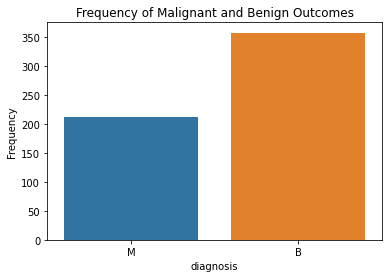

In [8]:
# Make a countplot for the diagnosis column
sns.countplot(x='diagnosis', data=df)
plt.ylabel('Frequency')
plt.title('Frequency of Malignant and Benign Outcomes')

The data doesn't seem equally distributed, but is still well distributed.

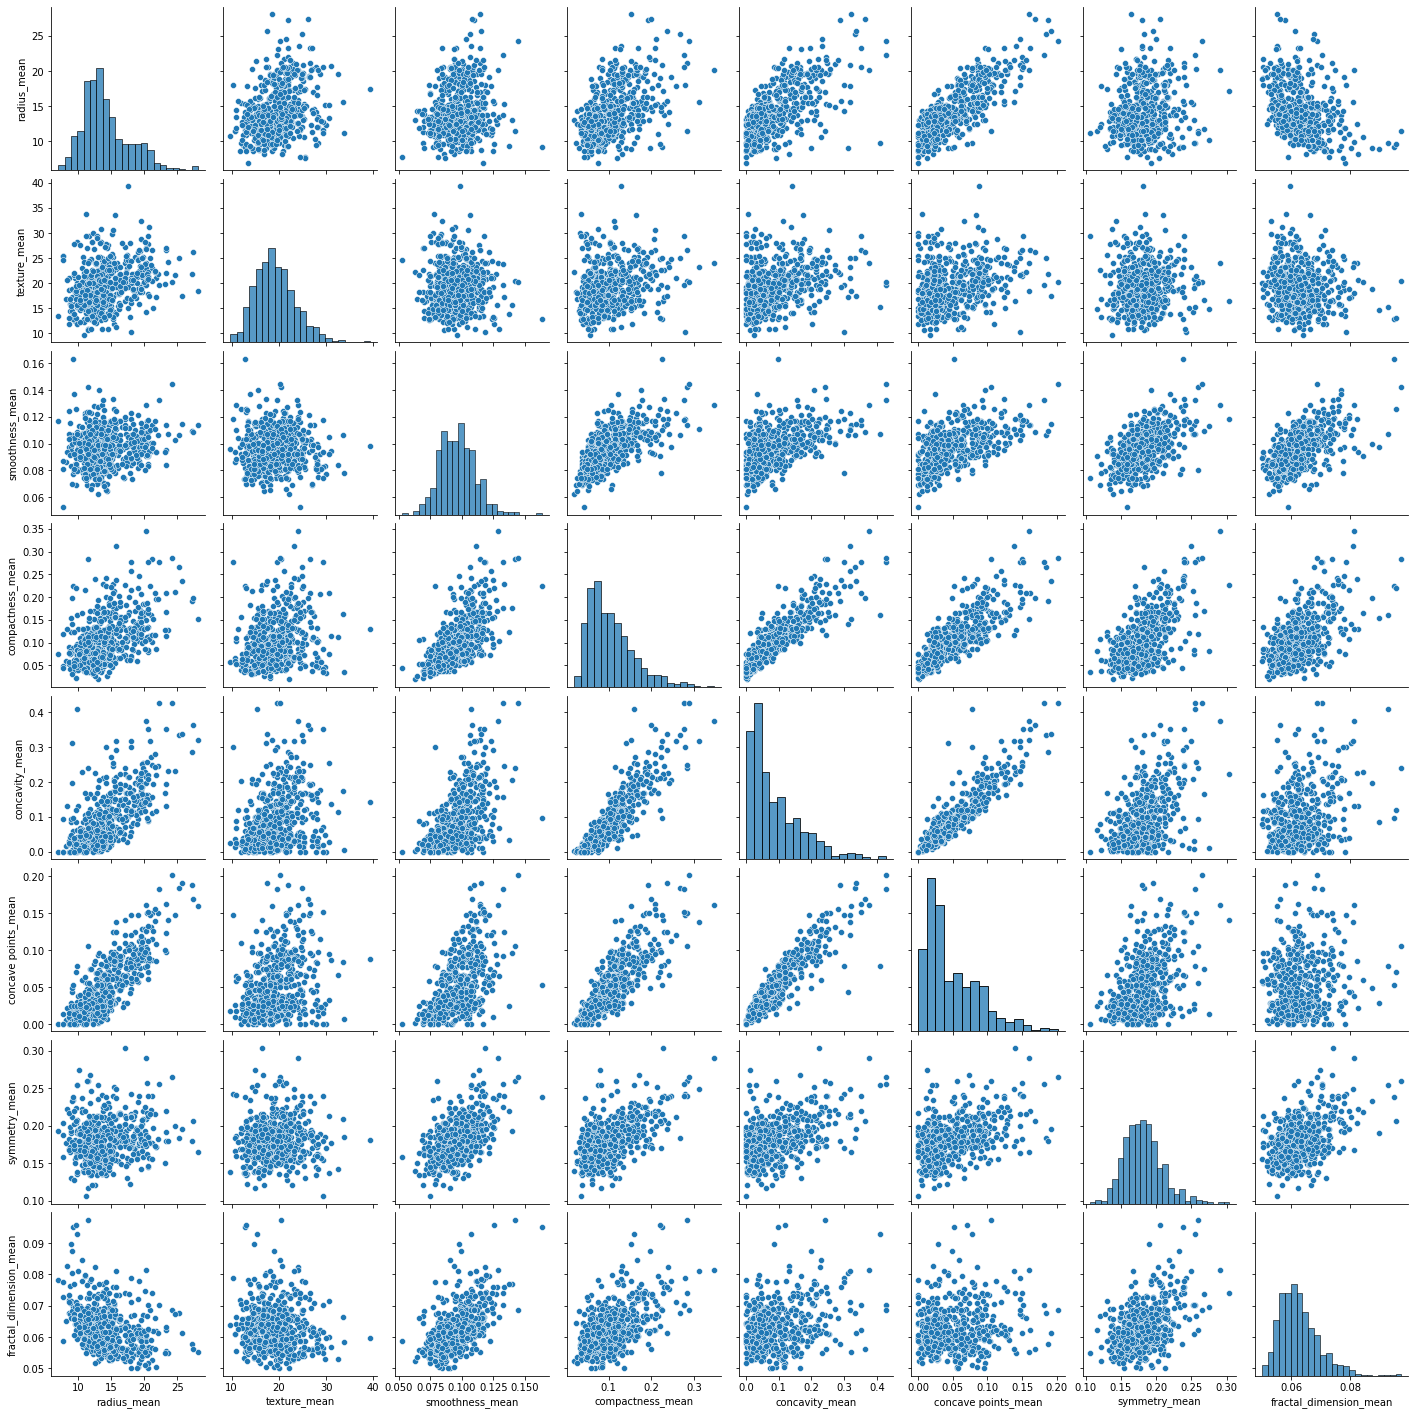

In [9]:
sns.pairplot(df)

From the pairplot, it is clear that there are some highly correlated features and some not-so-correlated ones. The correlation can be visualized using the `heatmap` feature of seaborn.

<AxesSubplot:>

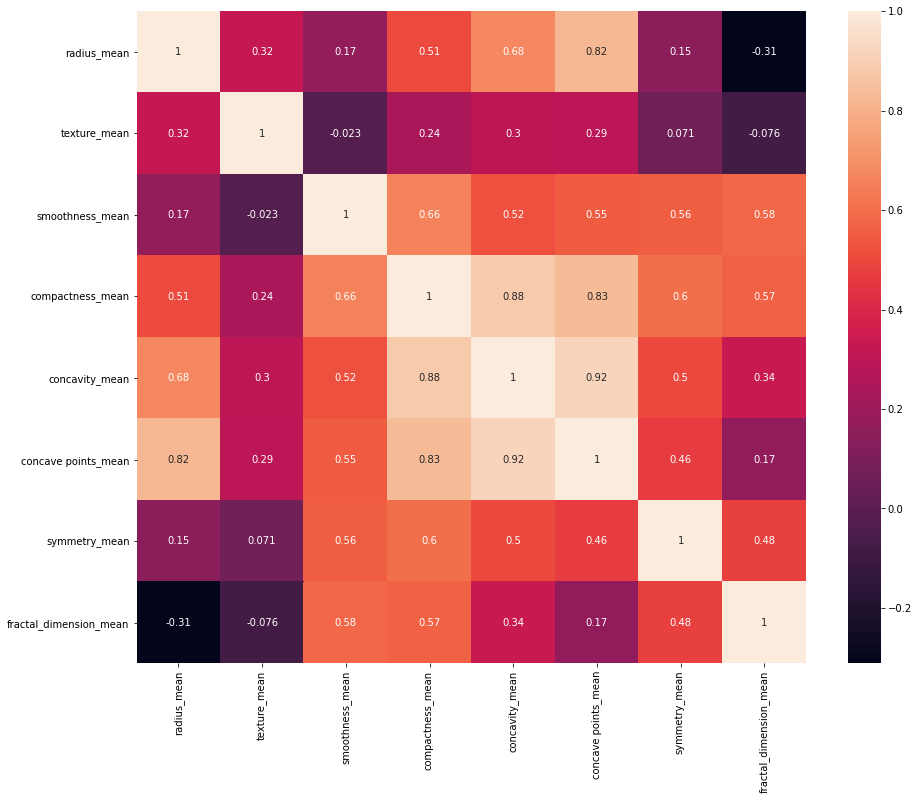

In [10]:
# Plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

This plot shows that the variables `concavity_mean`, `compactness_mean` and `concave_points_mean` are highly correlated with each other, which can cause them to be redundant in our model going forward. We will choose the `compactness_mean` to stay and get rid of the other two in our final dataset.

In [11]:
df = df.drop(['concavity_mean','concave points_mean'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883


Let's look at the average of each of these features that affect the diagnosis. For example, is the mean radius of the cells related to the diagnosis in some way?

In [12]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,
B,12.146524,17.914762,0.092478,0.080085,0.174186,0.062867
M,17.462830,21.604906,0.102898,0.145188,0.192909,0.062680


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

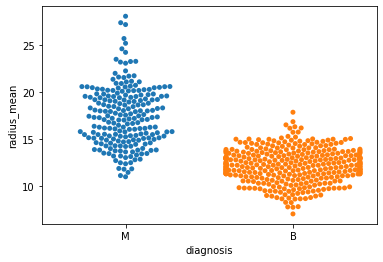

In [13]:
# Radius and diagnosis
sns.swarmplot(x='diagnosis', y='radius_mean', data=df)

Clearly, the malignant cells seem to have a larger mean radius, with both the minimum and maximum radii being more than that for the benign cancer cells. The next step will be pre-processing the data and get it prepared for a classification model.

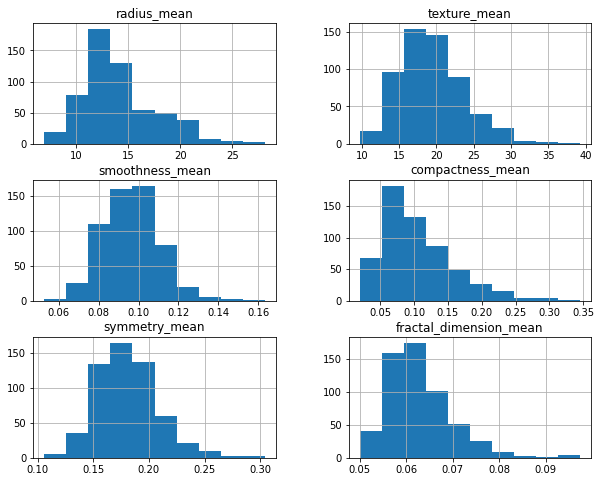

In [14]:
# Let's look at the distribution of the data in the dataframe
df.hist(figsize=(10,8))
plt.show()

There seems to be a tail on the right for most of the data and on the left for some. We will try to remove the tail by selecting just the part of the data that is within 2 standard deviations away from the mean. For this, I will use `sklearn`'s `MinMaxScaler()` in the next section.

# 3. Pre-processing and Training Data Development
***


In [43]:
# Categorical columns encoding
df_new.diagnosis = pd.get_dummies(df_new.diagnosis, drop_first=True)

# Define X and y variables
y, X = df_new.diagnosis, df_new.drop('diagnosis', axis=1)

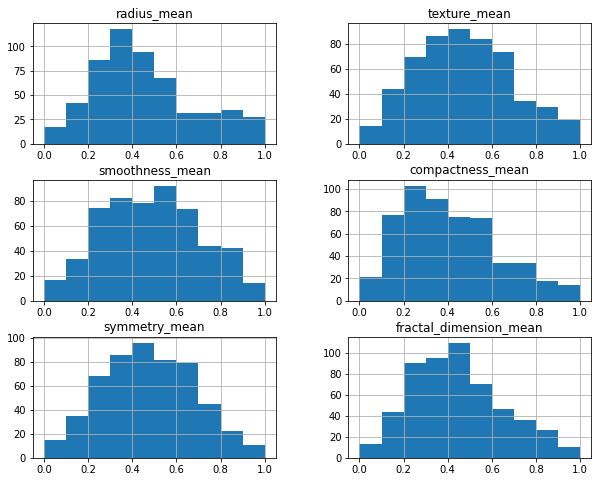

In [50]:
# Normalize the data using MinMaxScaler
mm_scaler = MinMaxScaler()
X_new = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)
X_new.hist(figsize=(10,8))
plt.show()

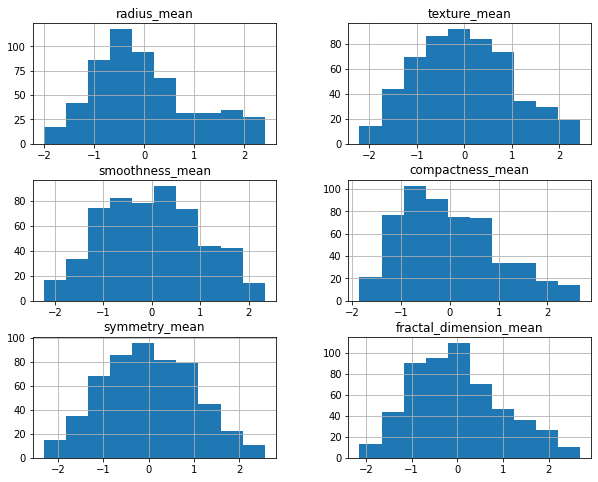

In [51]:
# standardize the magnitude of the independent features using scaling
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X_new), columns=X_new.columns)
scaled_X.hist(figsize=(10,8))
plt.show()

In [52]:
# Train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# check out the shapes of the test and train sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 6), (426,), (143, 6), (143,))

As we can see, the data is now scaled such that all the features are in and around the same range of values and are more or less normal in distribution. The categorical variables in the dataset have been encoded into `0` and `1` and the rest of the numeric columns have been scaled. The original data has also been divided into training and testing sets. Our data is ready to be fit into a machine learning classification model.